# WeatherPy

In [2]:
# citipy dependency - uncomment and run the line below if you do not have citipy installed
# pip install citipy

In [3]:
# Dependencies
import json
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import datetime

from api_keys import weather_api_key, g_key
from scipy import stats
from citipy import citipy
from datetime import date
from scipy.stats import linregress

# Seeding
seed = random.seed(69)

# Date
today = date.today()

In [4]:
# citipy setup
cities = []

random.seed(69)
while len(cities) < 1500:
    # randomly selects lat and long
    random_lat = random.uniform(-90, 90)
    random_long = random.uniform(-180, 180)
    
    # add to the cities list
    city = citipy.nearest_city(random_lat, random_long)
    cities.append(city.city_name)

## Generate Cities List

In [5]:
# Dict for all cities
cities_dict = {
    "City": cities
}

# cities df
cities_df = pd.DataFrame(cities_dict)

# unique cities
unique_cities = cities_df["City"].unique()
unique_cities_df = pd.DataFrame(unique_cities)
num_unique_cities = len(unique_cities)
num_unique_cities

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# openweather url
units = "&units=imperial"
openweather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

present_city = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the weather api with each city on the list
for city in unique_cities:
    weather_response = requests.get(openweather_url + city + units).json()
    try:
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt']) # must append the city list at the end to avoid unwanted appends!
        present_city.append(city)
        print(f"{city} found!")
    # Missing cities are filtered out
    except KeyError: 
        print(f"{city} data missing :(")
        pass

kahului found!
port alfred found!
narrabri found!
fevralsk data missing :(
broome found!
panlaitan found!
saldanha found!
sao jose da coroa grande found!
caravelas found!
rikitea found!
mahebourg found!
lasa found!
datong found!
ushuaia found!
tazovskiy found!
avarua found!
vaini found!
castro found!
cape town found!
azovo found!
hasaki found!
saleaula data missing :(
le port found!
tuktoyaktuk found!
victoria found!
buenos aires found!
albany found!
yellowknife found!
cap malheureux found!
lida found!
fortuna found!
nador found!
new norfolk found!
tilichiki found!
yeppoon found!
nouadhibou found!
faanui found!
kunya found!
mahaicony data missing :(
bluff found!
talnakh found!
barrow found!
sentyabrskiy data missing :(
nikolskoye found!
kabare found!
funadhoo found!
busselton found!
kodiak found!
taolanaro data missing :(
berlevag found!
mushie found!
kapaa found!
nechi found!
butaritari found!
fene found!
nalut found!
iskateley found!
araripina found!
arraial do cabo found!
dikson fou

palu found!
gien found!
ayr found!
kanniyakumari found!
portland found!
vila franca do campo found!
storforshei found!
banjar found!
longlac data missing :(
barra do garcas found!
omboue found!
tumannyy data missing :(
san policarpo found!
muriwai beach found!
waingapu found!
santa isabel found!
tabiauea data missing :(
grootfontein found!
bonthe found!
bubaque found!
azare found!
mrirt data missing :(
sangar found!
ahvaz found!
pereslavl-zalesskiy found!
boromo found!
padang found!
galiwinku data missing :(
amahai found!
shellbrook found!
logrono found!
tevriz found!
pangnirtung found!
ejido found!
inhambane found!
ixtapa found!
lincoln found!
angoche found!
caucaia found!
la orilla found!
suksun found!
anyang found!
suzun found!
kachug found!
sao joao de pirabas found!
shieli found!
nchelenge found!
ust-labinsk found!
vaitupu data missing :(
dhidhdhoo found!
rio gallegos found!
tura found!
tongliao found!
bairiki found!
nizhyn found!
benalla found!
barbar data missing :(
gillette fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
summary_df = pd.DataFrame({
    "City": present_city,
    "Lat": lat,
    "Lon": lon,
    "Max Temp (F)": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Save output data to this path
summary_df.to_csv(r'outputdata/cities_summary.csv', index = False)

# display the data
summary_df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,80.62,75,40,16.11,US,1626928229
1,port alfred,-33.5906,26.8910,46.92,85,90,30.09,ZA,1626928229
2,narrabri,-30.3167,149.7833,61.52,31,25,10.36,AU,1626928230
3,broome,42.2506,-75.8330,60.39,85,0,1.01,US,1626928230
4,panlaitan,12.1191,119.8486,83.30,81,76,25.10,PH,1626928231


In [8]:
summary_df.describe()

,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.00000,5.670000e+02
mean,20.151585,17.964909,70.070441,69.798942,52.671958,8.21739,1.626928e+09
std,32.926824,90.968871,14.058259,20.179542,39.291899,5.93020,1.114518e+02
min,-54.800000,-175.200000,30.960000,11.000000,0.000000,0.00000,1.626928e+09
25%,-3.942700,-63.069050,60.700000,57.000000,9.000000,3.98000,1.626928e+09
50%,24.093400,20.800000,71.310000,74.000000,59.000000,7.00000,1.626928e+09
75%,47.618400,100.259350,80.260000,85.000000,91.000000,11.39000,1.626928e+09
max,78.218600,179.316700,105.820000,100.000000,100.000000,35.68000,1.626929e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# There are no cities in df with humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

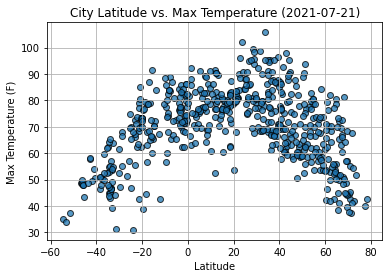

In [10]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 3], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_temp.png")

* This plot exhibits that the closer to latitude 30 the hotter the maximum temperature is of a city

## Latitude vs. Humidity Plot

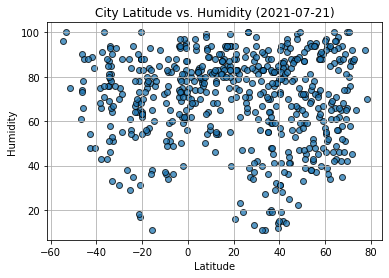

In [11]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 4], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_humidity.png")

* This plot exhibits that there is no clear relationship between latitude and humidity. 

## Latitude vs. Cloudiness Plot

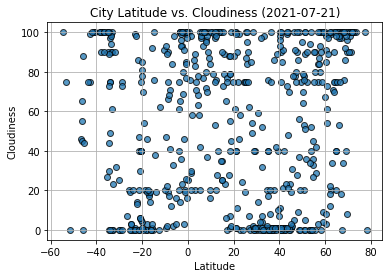

In [12]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 5], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_cloud.png")

* This plot also exhibits that there is no clear relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

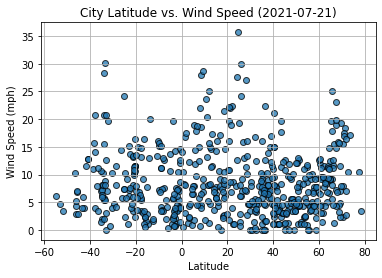

In [13]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 6], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_windspeed.png")

* This plot shows that most cities from the sample does not have wind speed more than 35 mph.

## Linear Regression

In [24]:
# Northern Hemisphere
nhem_df = summary_df.loc[summary_df["Lat"] >= 0]

# Southern Hemisphere
shem_df = summary_df.loc[summary_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.5607313110687839


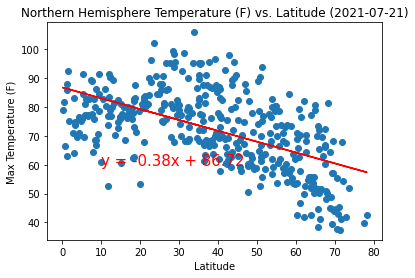

In [25]:
y = nhem_df.iloc[:, 3]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (10, 60), fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere Temperature (F) vs. Latitude ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_temp_vs_lat.png")
plt.show()

* This plot suggests that there is a moderate negative correlation between latitude and maximum temperature in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7504236477072662


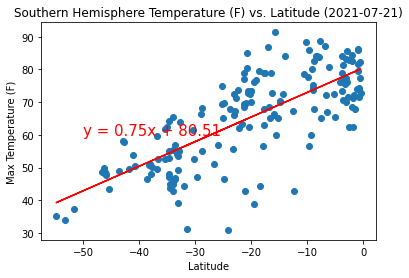

In [26]:
y = shem_df.iloc[:, 3]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50, 60), fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere Temperature (F) vs. Latitude ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_temp_vs_lat.png")
plt.show()

* Conversely, this plot shows us that there is strong positive correlation between latitude and maximum temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.12618149999723502


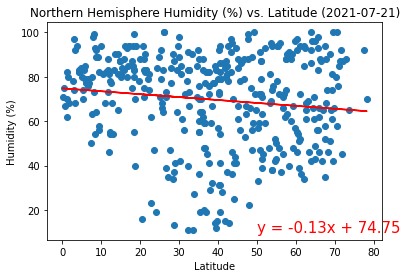

In [27]:
y = nhem_df.iloc[:, 4]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (50, 10), fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere Humidity (%) vs. Latitude ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_hum_vs_lat.png")
plt.show()

* This plot shows that there is no significant correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.02984389949728654


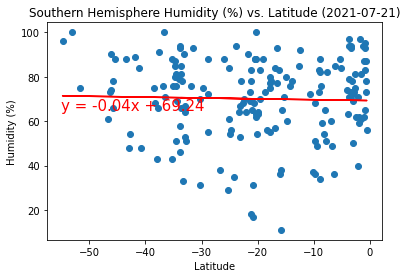

In [28]:
y = shem_df.iloc[:, 4]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55, 65), fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere Humidity (%) vs. Latitude ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_hum_vs_lat.png")
plt.show()

* This plot also shows that there is no significant correlation between latitude and humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05225577298516465


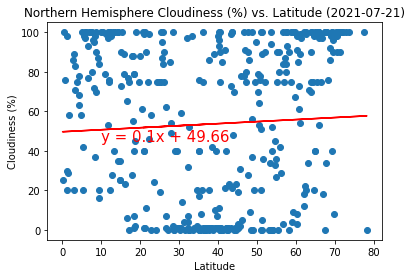

In [29]:
y = nhem_df.iloc[:, 5]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (10, 45), fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere Cloudiness (%) vs. Latitude ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_cloud_vs_lat.png")
plt.show()

* This plot shows that there is no significant correlation between latitude and cloudiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.059534511843721216


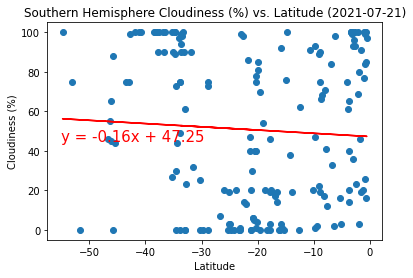

In [30]:
y = shem_df.iloc[:, 5]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55, 45), fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere Cloudiness (%) vs. Latitude ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_cloud_vs_lat.png")
plt.show()

* This plot also shows that there is no significant correlation between latitude and cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0775593857454659


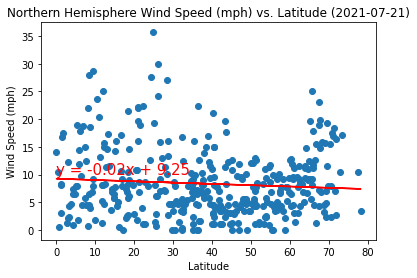

In [31]:
y = nhem_df.iloc[:, 6]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 10), fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere Wind Speed (mph) vs. Latitude ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_wind_vs_lat.png")
plt.show()

* This plot also shows that there is no significant correlation between latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12668769529773702


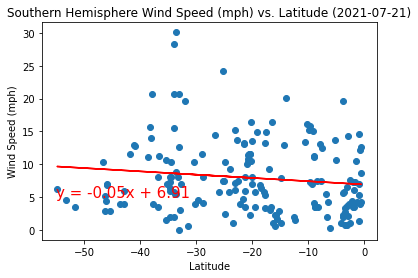

In [32]:
y = shem_df.iloc[:, 6]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55, 5), fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere Wind Speed (mph) vs. Latitude ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_wind_vs_lat.png")
plt.show()

* This plot also shows that there is no significant correlation between latitude and wind speed in the Southern Hemisphere.

### Analysis

1. There is no significant relationship between latitude and cloudiness, humidity, and wind speed.
    * This is most likely because all kinds of biomes and climates exists in all latitudes. 

2. There is a significant correlation between latitude and maximum temperature. The closer it is to the equator, the higher the max temperature.
   * This is because the equator (latitude plus or minus 30) and its surrounding area has the most direct exposure to sunlight compared to extream latitudes.

3. To expand on the previous point, the Northern Hemisphere latitude and max temperature has a significant negative correlation, and the Souther Hemisphere latitude and max temperature has a significant positive correlation. 
    * Again, the closer it is to the equator, the more direct sunlight the locations has, this rises the temperature. The Northern Hemisphere only composes of positive latitude, which inherits the negative correlation, which the Souther Hemisphere only composes of negative latitide, which inherits the positive correlation.